<h1>Data</h1>

<h2>coordinates</h2>
The purpose of this module is to randomly provide a sample of points from a grid.

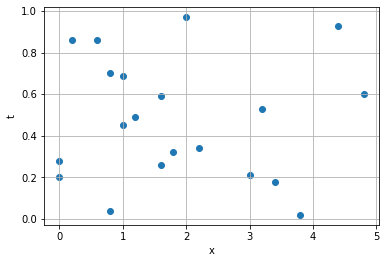

In [24]:
from direct_problem import Grid
from data import Coordinates

import matplotlib.pyplot as plt

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)

coordinates = Coordinates(grid)
sample_size = 20

x, t = coordinates.get_random_coordinates(sample_size)

def show(x, t):
    plt.scatter(x, t)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("t")

show(x, t)

<h2>Parameters</h2>
This module provide a set of random paramters alpha, beta, a and b. Parameters_size represent the number of problems that will be solved to generate the data.

In [25]:
from data import RandomParameters


parameters_size = 500
parameters = RandomParameters(
    parameters_size=parameters_size)

parameters 

      alpha      beta         a         b
0  0.855316  0.071068  2.450056  0.063832
1  0.322255  0.681384  2.886709  2.591783
2  0.106924  0.378112  0.656733  2.193469
3  0.820969  0.910015  2.630775  1.864681
4  0.951341  0.174091  1.843973  1.407217

<h2>data_generator</h2>
Generate the dataset from the sampled grid and the parameters. 

In [26]:
import numpy as np

from data import DataGenerator


f = lambda x: np.maximum(2-x, 0)

data_generator = DataGenerator(coordinates, parameters, solution_at_t_equal_zero=f)

# Provide raw solutions
raw_solution = data_generator.generate_data()


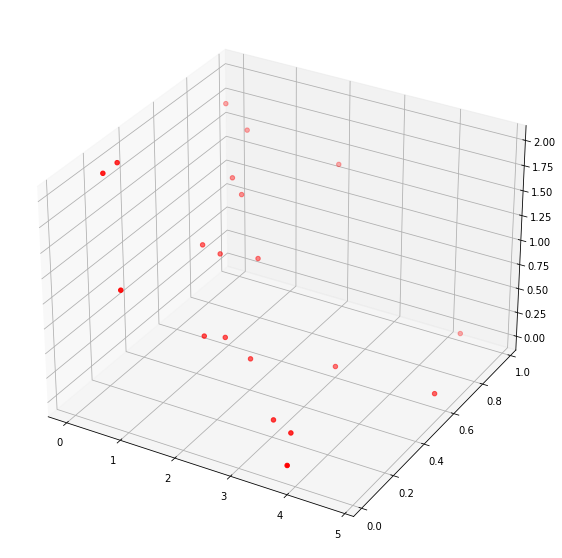

In [27]:
# Here is an illustration of what one item of input data looks like:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
T, X = np.meshgrid(x, t)
ax.scatter(x, t, raw_solution[0], c="r")



For training purpose, we'll ask pytorch to provide this raw data as a dataloader

In [29]:
# Provide a DataLoader object
train_dl, test_dl = data_generator.dataloader(batch_size=50)